In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, confusion_matrix, roc_auc_score, roc_curve, make_scorer, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import pickle as pkl

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
loans_df = pd.read_csv('loans_clean.csv')

count    256366.000000
mean         16.543057
std           7.791353
min           0.000000
25%          10.750000
50%          16.210000
75%          22.000000
max          57.140000
Name: dti, dtype: float64

In [5]:
loans_df.head()

,Unnamed: 0,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,inq_last_6mths,installment,int_rate,loan_status,open_acc,...,tot_coll_amt,tot_cur_bal,home_ownership,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,24000.0,0.0,0.0,27.65,1.0,162.87,10.65,0.0,3.0,...,NaN,NaN,0.0,0,1,0,0,0,0,0
1,1,30000.0,0.0,0.0,1.00,5.0,59.83,15.27,1.0,3.0,...,NaN,NaN,0.0,1,0,1,0,0,0,0
2,2,12252.0,0.0,0.0,8.72,2.0,84.33,15.96,0.0,2.0,...,NaN,NaN,0.0,0,0,1,0,0,0,0
3,3,49200.0,0.0,0.0,20.00,1.0,339.31,13.49,0.0,10.0,...,NaN,NaN,0.0,0,0,1,0,0,0,0
4,5,36000.0,0.0,0.0,11.20,3.0,156.46,7.90,0.0,9.0,...,NaN,NaN,0.0,0,0,0,0,0,0,0


In [6]:
loans_df = loans_df.drop(columns=['Unnamed: 0'])

In [7]:
loans_df.head()

,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,inq_last_6mths,installment,int_rate,loan_status,open_acc,pub_rec,...,tot_coll_amt,tot_cur_bal,home_ownership,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,24000.0,0.0,0.0,27.65,1.0,162.87,10.65,0.0,3.0,0.0,...,NaN,NaN,0.0,0,1,0,0,0,0,0
1,30000.0,0.0,0.0,1.00,5.0,59.83,15.27,1.0,3.0,0.0,...,NaN,NaN,0.0,1,0,1,0,0,0,0
2,12252.0,0.0,0.0,8.72,2.0,84.33,15.96,0.0,2.0,0.0,...,NaN,NaN,0.0,0,0,1,0,0,0,0
3,49200.0,0.0,0.0,20.00,1.0,339.31,13.49,0.0,10.0,0.0,...,NaN,NaN,0.0,0,0,1,0,0,0,0
4,36000.0,0.0,0.0,11.20,3.0,156.46,7.90,0.0,9.0,0.0,...,NaN,NaN,0.0,0,0,0,0,0,0,0


In [8]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256366 entries, 0 to 256365
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  256366 non-null  float64
 1   collections_12_mths_ex_med  256366 non-null  float64
 2   delinq_2yrs                 256366 non-null  float64
 3   dti                         256366 non-null  float64
 4   inq_last_6mths              256366 non-null  float64
 5   installment                 256366 non-null  float64
 6   int_rate                    256366 non-null  float64
 7   loan_status                 256366 non-null  float64
 8   open_acc                    256366 non-null  float64
 9   pub_rec                     256366 non-null  float64
 10  revol_util                  256366 non-null  float64
 11  total_acc                   256366 non-null  float64
 12  acc_now_delinq              256366 non-null  float64
 13  tot_coll_amt  

In [9]:
X = loans_df[['annual_inc', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'int_rate', 'open_acc',\
               'pub_rec', 'revol_util', 'total_acc', 'acc_now_delinq', 'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',\
               'grade_G', 'installment']]
y = loans_df['loan_status']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=137, stratify=y)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=137)

In [12]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_val_scaled = std_scale.fit_transform(X_val)
X_test_scaled = std_scale.fit_transform(X_test)

In [57]:
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced')

In [58]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [67]:
f1_score(y_val, random_forest.predict(X_val))

0.06659999999999999

In [62]:
precision_score(y_val, random_forest.predict(X_val))

0.4475806451612903

In [63]:
recall_score(y_val, random_forest.predict(X_val))

0.03597666378565255

In [64]:
f1_score(y_val, random_forest.predict(X_val), average='weighted')

0.74653468948092

In [65]:
precision_score(y_val, random_forest.predict(X_val), average='weighted')

0.7535107942944226

In [66]:
recall_score(y_val, random_forest.predict(X_val), average='weighted')

0.8162128103648572

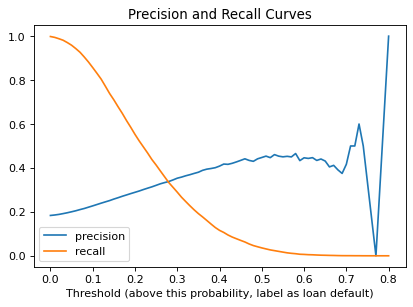

In [81]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, random_forest.predict_proba(X_val)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as loan default)');
plt.title('Precision and Recall Curves');

In [22]:
param_grid = {'max_depth' : [5, 10, 20, 50],
              'n_estimators' : [50, 100, 200, 1000],
              'class_weight' : ['balanced', 'balanced_subsample']
             }


In [ ]:
grid = GridSearchCV(random_forest, param_grid, cv=10, scoring='precision')

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

In [25]:
param_dist = {'max_depth' : [5, 10, 20, 50],
              'n_estimators' : [50, 100, 200, 1000],
              'class_weight' : ['balanced', 'balanced_subsample']
             }



In [152]:
random_grid = RandomizedSearchCV(random_forest, param_dist, scoring='f1', n_jobs=-2)

In [153]:
random_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-2,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [5, 10, 20, 50],
                                        'n_estimators': [50, 100, 200, 1000]},
                   scoring='f1')

In [154]:
print("Best params: ", random_grid.best_params_)
print("Best estimator: ", random_grid.best_estimator_)
print("Best score: ", random_grid.best_score_)

Best params:  {'n_estimators': 1000, 'max_depth': 10, 'class_weight': 'balanced_subsample'}
Best estimator:  RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=1000)
Best score:  0.40274820445366205


In [155]:
random_grid.cv_results_

{'mean_fit_time': array([121.2694416 ,  11.56288605,  20.57430906,  24.84685535,
         44.61872292,  10.82660575,  52.07712026,  73.53900924,
        147.21265607,  12.82631955]),
 'std_fit_time': array([ 0.20785082,  0.07039837,  0.58023243,  0.27744   ,  0.11257584,
         0.16085774,  0.28413595,  0.34700035, 10.72543679,  0.41512139]),
 'mean_score_time': array([3.72711883, 0.35932922, 0.78194628, 0.8141283 , 1.67536311,
        0.28081164, 2.46813831, 2.48846431, 2.89606538, 0.41830106]),
 'std_score_time': array([0.02279812, 0.00420654, 0.0170073 , 0.01736843, 0.04004803,
        0.0114762 , 0.02464962, 0.0166158 , 0.41882153, 0.00711   ]),
 'param_n_estimators': masked_array(data=[1000, 100, 100, 100, 200, 100, 200, 1000, 1000, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 10, 20, 20, 20, 5, 50, 5, 10, 20],
    

In [11]:
random_forest = RandomForestClassifier(n_estimators=1000, class_weight='balanced_subsample', max_depth=10)
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=1000)

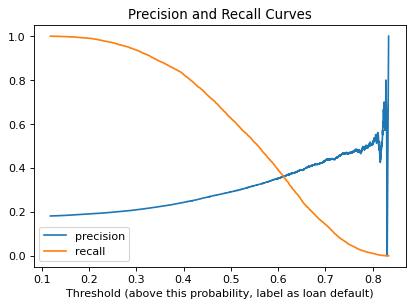

In [12]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, random_forest.predict_proba(X_val)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as loan default)');
plt.title('Precision and Recall Curves');

In [13]:
gbm = xgb.XGBRegressor(n_estimators=30000, max_depth=3, objective='reg:squarederror', learning_rate=0.1, subsample=1, min_child_weight=1)

In [14]:
eval_set = [(X_train, y_train), (X_val, y_val)]

In [15]:
gbm_fit = gbm.fit(X_train, y_train, eval_set = eval_set, eval_metric='rmse', early_stopping_rounds=50, verbose=False)

In [16]:
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [17]:
rmse(gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit), y_val)

0.36855118143738297

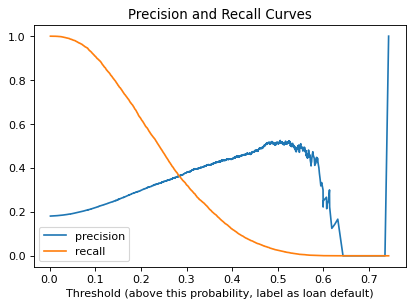

In [18]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, gbm.predict(X_val))

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as loan default)');
plt.title('Precision and Recall Curves');

In [19]:
gbm_threshold = 0.25

In [20]:
f1_score(y_val, gbm.predict(X_val) > gbm_threshold)

0.39226801201745937

In [21]:
precision_score(y_val, gbm.predict(X_val) > gbm_threshold)

0.33762685402029663

In [22]:
recall_score(y_val, gbm.predict(X_val) > gbm_threshold)

0.4680102799945895

In [23]:
f1_score(y_val, gbm.predict(X_val) > gbm_threshold, average='weighted')

0.7539892015365695

In [24]:
precision_score(y_val, gbm.predict(X_val) > gbm_threshold, average='weighted')

0.7758395640246402

In [25]:
recall_score(y_val, gbm.predict(X_val) > gbm_threshold, average='weighted')

0.7386333162680709

In [161]:
gbm_params = {'objective': ['reg:squarederror'],
              'booster': ['gbtree'],
              'learning_rate': np.linspace(0.01, 1, 20),
              'max_depth': range(1, 22, 3),
              'min_child_weight': range(1, 31, 3),
              'n_estimators': range(100, 50000, 2000),
              'reg_alpha': [0.2, 0.5, 1],
              'reg_lambda': [2, 3, 5],
              'gamma': [1, 2, 3]
             }

In [162]:
gbm_grid = RandomizedSearchCV(gbm, gbm_params, scoring='f1', n_jobs=-2)

0.18294828038855343

In [ ]:
gbm_grid.fit(X_train, y_train)

In [ ]:
print("Best params: ", gbm_grid.best_params_)
print("Best estimator: ", gbm_grid.best_estimator_)
print("Best score: ", gbm_grid.best_score_)

In [ ]:
gbm_grid.cv_results_

In [38]:
lm = LogisticRegression(C=1, class_weight='balanced')
lm.fit(X_train_scaled, y_train)

LogisticRegression(C=1, class_weight='balanced')

In [28]:
for column, coef in zip(X_train.columns, lm.coef_[0]):
    print (f'{column}: {coef}')

annual_inc: -0.28453073206967666
collections_12_mths_ex_med: 0.01634812375815057
delinq_2yrs: 0.03487113268034187
dti: 0.17366075283211896
inq_last_6mths: 0.10874998931368313
int_rate: 0.46848915177086986
open_acc: 0.07759489714611521
pub_rec: -0.008157126513906508
revol_util: 0.06555156916332934
total_acc: -0.18708815663016906
acc_now_delinq: -0.0009374351495794527
term_ 60 months: 0.17624508895533056
grade_B: 0.08635578588757153
grade_C: 0.10633564632323543
grade_D: 0.08619749515123452
grade_E: 0.043550315706198835
grade_F: -0.009862258590319882
grade_G: -0.009424926748974358
installment: 0.07362509994794908


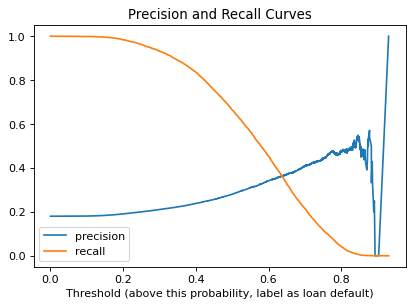

In [29]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, lm.predict_proba(X_val_scaled)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as loan default)');
plt.title('Precision and Recall Curves');

In [30]:
lm_threshold = .25

In [31]:
f1_score(y_val, lm.predict(X_val_scaled), average='weighted')

0.674137247229149

In [32]:
recall_score(y_val, lm.predict(X_val_scaled), average='weighted')

0.6319510470757453

In [33]:
precision_score(y_val, lm.predict(X_val_scaled), average='weighted')

0.7836950544166008

In [34]:
f1_score(y_val, lm.predict_proba(X_val_scaled)[:,1] > lm_threshold)

0.33117608715895336

In [35]:
recall_score(y_val, lm.predict_proba(X_val_scaled)[:,1] > lm_threshold)

0.9621263357229812

In [36]:
precision_score(y_val, lm.predict_proba(X_val_scaled)[:,1] > lm_threshold)

0.20001124764502431

In [37]:
knn = KNeighborsClassifier(n_neighbors=52, weights='uniform')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=52)

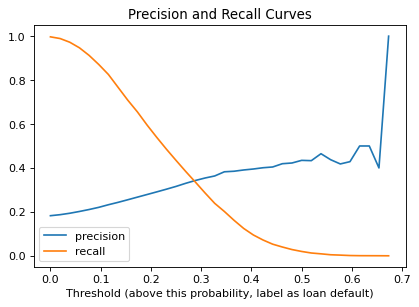

In [38]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, knn.predict_proba(X_val_scaled)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as loan default)');
plt.title('Precision and Recall Curves');

In [39]:
f1_score(y_val, knn.predict(X_val_scaled), average='weighted')

0.7445316961350863

In [40]:
recall_score(y_val, knn.predict(X_val_scaled), average='weighted')

0.8186937760549989

In [41]:
precision_score(y_val, knn.predict(X_val_scaled), average='weighted')

0.7520544560979996

In [42]:
f1_score(y_val, knn.predict(X_val_scaled))

0.037779790399792984

In [43]:
recall_score(y_val, knn.predict(X_val_scaled))

0.019748410658731234

In [44]:
precision_score(y_val, knn.predict(X_val_scaled))

0.43452380952380953

In [45]:
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_val, random_forest.predict_proba(X_val)[:,1])
fpr_gbm, tpr_gbm, threshold_gbm = roc_curve(y_val, gbm.predict(X_val))
fpr_lm, tpr_lm, threshold_lm = roc_curve(y_val, lm.predict_proba(X_val_scaled)[:,1])
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_val, knn.predict_proba(X_val_scaled)[:,1])

ROC AUC score (Random Forest) =  0.7008801288195661
ROC AUC score (XGBoost) =  0.704954517998281
ROC AUC score (Logistic Reg) =  0.6996392973627704
ROC AUC score (KNN) =  0.6786041938765333


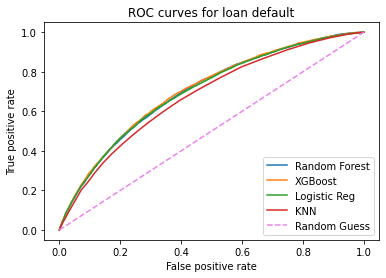

In [51]:
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_gbm, tpr_gbm)
plt.plot(fpr_lm, tpr_lm)
plt.plot(fpr_knn, tpr_knn)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(['Random Forest', 'XGBoost', 'Logistic Reg', 'KNN', 'Random Guess'])
plt.title('ROC curves for loan default')
plt.savefig('ROC_curves.png', facecolor='w', edgecolor='w', dpi=200, bbox_inches='tight');
print("ROC AUC score (Random Forest) = ", roc_auc_score(y_val, random_forest.predict_proba(X_val)[:,1]))
print("ROC AUC score (XGBoost) = ", roc_auc_score(y_val, gbm.predict(X_val)))
print("ROC AUC score (Logistic Reg) = ", roc_auc_score(y_val, lm.predict_proba(X_val_scaled)[:,1]))
print("ROC AUC score (KNN) = ", roc_auc_score(y_val, knn.predict_proba(X_val_scaled)[:,1]))

In [47]:
confusion_matrix(y_val, random_forest.predict_proba(X_val)[:,1] > .25)

array([[ 4635, 28991],
       [  223,  7170]])

In [48]:
confusion_matrix(y_val, gbm.predict(X_val) > .25)

array([[26838,  6788],
       [ 3933,  3460]])

In [49]:
confusion_matrix(y_val, knn.predict_proba(X_val_scaled)[:,1] > .25)

array([[26673,  6953],
       [ 4182,  3211]])

In [50]:
confusion_matrix(y_val, lm.predict_proba(X_val_scaled)[:,1] > .25)

array([[ 5176, 28450],
       [  280,  7113]])

In [85]:
random_forest.predict_proba(X_val)[:,1]

array([0.21, 0.41, 0.12, ..., 0.2 , 0.2 , 0.04])

In [86]:
gbm.predict(X_val)

array([0.17312993, 0.41174495, 0.07497153, ..., 0.24253951, 0.2563092 ,
       0.06687836], dtype=float32)

In [74]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [52]:
lm_param_grid = {'C' : [.01, .1, .3, .5, .7, .9, 1, 10, 100, 1000, 10000],
              'penalty' : ['l1', 'l2'],
              'solver' : ['liblinear'],
              'class_weight' : ['balanced'],
              'max_iter' : [50, 100, 250, 500, 1000]
             }

In [75]:
lm_grid = RandomizedSearchCV(lm, lm_param_grid, scoring=ftwo_scorer, n_jobs=-2)

In [76]:
lm_grid.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=LogisticRegression(C=1, class_weight='balanced'),
                   n_jobs=-2,
                   param_distributions={'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1,
                                              10, 100, 1000, 10000],
                                        'class_weight': ['balanced'],
                                        'max_iter': [50, 100, 250, 500, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   scoring=make_scorer(fbeta_score, beta=2))

In [77]:
print("Best params: ", lm_grid.best_params_)
print("Best estimator: ", lm_grid.best_estimator_)
print("Best score: ", lm_grid.best_score_)

Best params:  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'class_weight': 'balanced', 'C': 100}
Best estimator:  LogisticRegression(C=100, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')
Best score:  0.5229898257475247


In [78]:
lm_grid.cv_results_

{'mean_fit_time': array([2.48481016, 2.03381662, 0.7567153 , 1.533776  , 0.742415  ,
        0.58742533, 0.58717694, 0.6274086 , 2.03043785, 0.77032714]),
 'std_fit_time': array([0.30600025, 0.49407404, 0.01963809, 0.50756049, 0.10317872,
        0.00960527, 0.02618266, 0.02404787, 0.1008611 , 0.13815812]),
 'mean_score_time': array([0.03115783, 0.02947197, 0.02246432, 0.02306218, 0.02809553,
        0.02290468, 0.02702947, 0.02551708, 0.0258327 , 0.02098136]),
 'std_score_time': array([0.00486691, 0.01051673, 0.00345994, 0.00391687, 0.00393702,
        0.00308864, 0.00750977, 0.00069157, 0.01329595, 0.00655035]),
 'param_solver': masked_array(data=['liblinear', 'liblinear', 'liblinear', 'liblinear',
                    'liblinear', 'liblinear', 'liblinear', 'liblinear',
                    'liblinear', 'liblinear'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_

In [39]:
lm_param_grid_fine = {'C' : [.1, .25, .5, .75, 1, 10, 25, 50, 75, 100, 125, 150, 200, 250],
              'penalty' : ['l1', 'l2'],
              'solver' : ['liblinear'],
              'class_weight' : ['balanced'],
              'max_iter' : [800, 1000, 1200]
             }

In [40]:
lm_grid_fine = GridSearchCV(lm, lm_param_grid_fine, scoring=ftwo_scorer)

In [41]:
lm_grid_fine.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(C=1, class_weight='balanced'),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 10, 25, 50, 75, 100,
                               125, 150, 200, 250],
                         'class_weight': ['balanced'],
                         'max_iter': [800, 1000, 1200], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring=make_scorer(fbeta_score, beta=2))

In [42]:
print("Best params: ", lm_grid_fine.best_params_)
print("Best estimator: ", lm_grid_fine.best_estimator_)
print("Best score: ", lm_grid_fine.best_score_)

Best params:  {'C': 0.5, 'class_weight': 'balanced', 'max_iter': 800, 'penalty': 'l1', 'solver': 'liblinear'}
Best estimator:  LogisticRegression(C=0.5, class_weight='balanced', max_iter=800, penalty='l1',
                   solver='liblinear')
Best score:  0.5230133930741954


In [43]:
lm_grid_fine.cv_results_

{'mean_fit_time': array([0.78150511, 0.28092947, 0.77226014, 0.28193016, 0.80525899,
        0.28154626, 0.82956805, 0.31962395, 0.75516605, 0.31654005,
        0.76200194, 0.28230262, 0.75455084, 0.27987251, 0.74600191,
        0.27823009, 0.79374371, 0.28459492, 0.80772796, 0.28062263,
        0.70503817, 0.27847047, 0.74061437, 0.28133163, 0.82279572,
        0.27622647, 0.72681241, 0.28128719, 0.77765102, 0.28145709,
        0.78350768, 0.28187785, 0.78467283, 0.28288684, 0.78080359,
        0.29013782, 0.75590677, 0.28147302, 0.83336964, 0.27935781,
        0.78567815, 0.2791863 , 0.79221597, 0.27802806, 0.66108599,
        0.28505306, 0.746171  , 0.27838755, 0.82741165, 0.27820463,
        0.76875334, 0.28470755, 0.83323588, 0.28356557, 0.60105934,
        0.28730412, 0.69245715, 0.29020109, 0.8063026 , 0.28504543,
        0.66911702, 0.28433886, 0.79443188, 0.28420014, 0.74921484,
        0.28134675, 0.78578477, 0.27763724, 0.76621356, 0.27788401,
        0.804738  , 0.28155899,

In [13]:
lm_improved = LogisticRegression(C=0.5, class_weight='balanced', max_iter=800, penalty='l1', solver='liblinear')
lm_improved.fit(X_train_scaled, y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=800, penalty='l1',
                   solver='liblinear')

In [14]:
for column, coef in zip(X_train.columns, lm_improved.coef_[0]):
    print (f'{column}: {coef}')

annual_inc: -0.28429359284944233
collections_12_mths_ex_med: 0.016295329426037484
delinq_2yrs: 0.03479460848488234
dti: 0.17367890613959894
inq_last_6mths: 0.10867691468542905
int_rate: 0.46886262786989374
open_acc: 0.07737359337036873
pub_rec: -0.008104875414889894
revol_util: 0.0654743779654732
total_acc: -0.18690098255052162
acc_now_delinq: -0.0008832155838323786
term_ 60 months: 0.17617524582508298
grade_B: 0.08590559318414163
grade_C: 0.10583394058998313
grade_D: 0.08568542368059454
grade_E: 0.043125941901795216
grade_F: -0.010096851173994847
grade_G: -0.00953304790410287
installment: 0.07350462098947733


In [60]:
loans_df['installment'].describe()

count    256366.000000
mean        417.168267
std         244.836516
min          15.670000
25%         238.500000
50%         364.620000
75%         546.600000
max        1424.570000
Name: installment, dtype: float64

In [15]:
len(lm_improved.coef_[0])

19

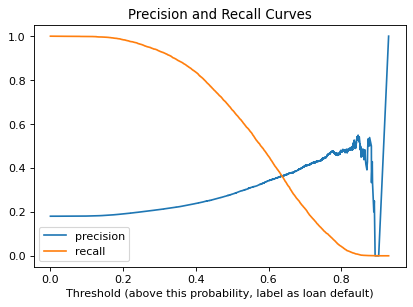

In [16]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, lm_improved.predict_proba(X_val_scaled)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as loan default)');
plt.title('Precision and Recall Curves');

# Final Model Instantiation, Training, and Testing

In [22]:
X = loans_df[['annual_inc', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'int_rate', 'open_acc',\
               'pub_rec', 'revol_util', 'total_acc', 'acc_now_delinq', 'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',\
               'grade_G', 'installment']]
y = loans_df['loan_status']


In [23]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=137, stratify=y)

In [24]:
std_scale = StandardScaler()
X_train_scaled_final = std_scale.fit_transform(X_train_final)
X_test_scaled_final = std_scale.fit_transform(X_test_final)

In [25]:
lm_final = LogisticRegression(C=0.5, class_weight='balanced', max_iter=800, penalty='l1', solver='liblinear')
lm_final.fit(X_train_scaled_final, y_train_final)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=800, penalty='l1',
                   solver='liblinear')

In [26]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [31]:
fbeta_score(y_test_final, lm_final.predict(X_test_scaled_final), beta=2)

0.520482414768899

In [47]:
print(classification_report(y_test_final, lm_final.predict(X_test_scaled_final)))

              precision    recall  f1-score   support

         0.0       0.89      0.63      0.74     41853
         1.0       0.29      0.66      0.40      9421

    accuracy                           0.63     51274
   macro avg       0.59      0.64      0.57     51274
weighted avg       0.78      0.63      0.68     51274



In [33]:
conf_matrix = confusion_matrix(y_test_final, lm_final.predict(X_test_scaled_final))

<AxesSubplot:>

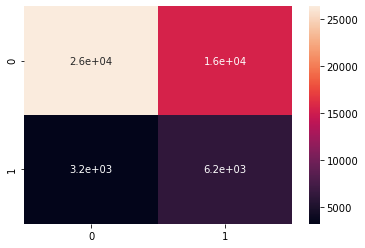

In [35]:
sns.heatmap(conf_matrix, annot=True)

In [27]:
X_train_final.columns

Index(['annual_inc', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti',
       'inq_last_6mths', 'int_rate', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'acc_now_delinq', 'term_ 60 months', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'installment'],
      dtype='object')

In [28]:
lm_final.features = X_train_final.columns

In [29]:
lm_final.features

Index(['annual_inc', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti',
       'inq_last_6mths', 'int_rate', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'acc_now_delinq', 'term_ 60 months', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'installment'],
      dtype='object')

In [30]:
with open("lm.pkl", "wb") as f:
    pkl.dump(lm_final, f)